In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "data/example_1/example_1_treatments.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,group,VIP
0,Control,36.534313
1,Control,61.664790
2,Control,36.967169
3,Control,15.669970
4,Control,49.550501
...,...,...
75,Treatment C,58.988618
76,Treatment C,31.492180
77,Treatment C,50.347208
78,Treatment C,46.205482


<Axes: xlabel='VIP', ylabel='Count'>

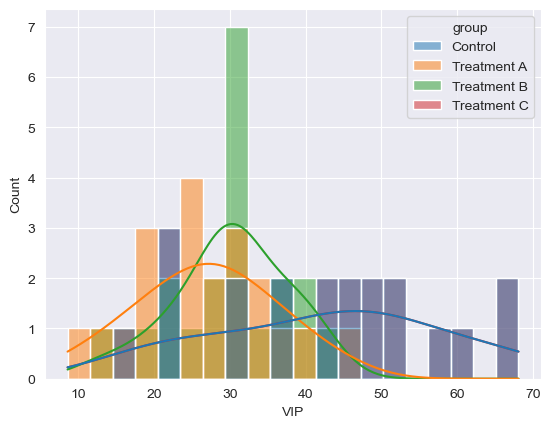

In [5]:
sns.histplot(data=df, x='VIP',bins=20, hue= 'group', kde=True)

<Axes: xlabel='group', ylabel='VIP'>

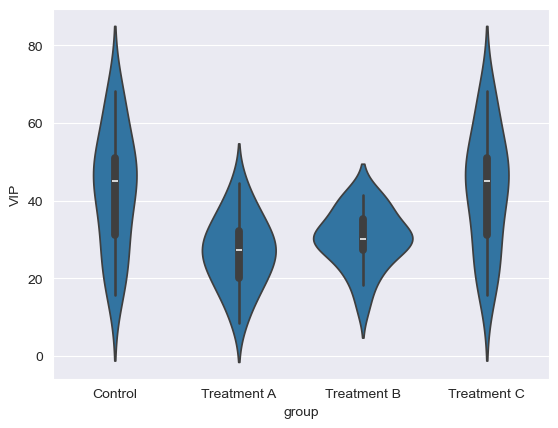

In [6]:
sns.violinplot(data=df, y='VIP', x='group')

<Axes: xlabel='group', ylabel='VIP'>

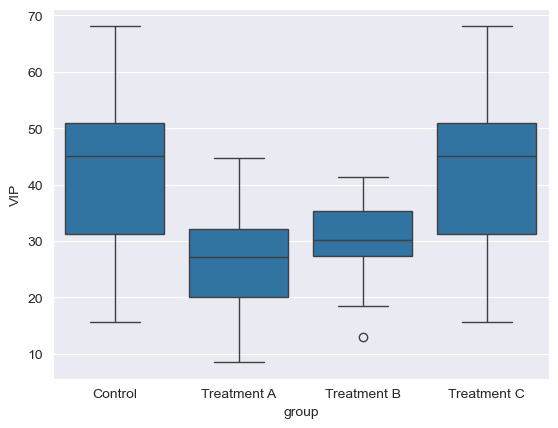

In [7]:
sns.boxplot(data=df, y='VIP', x='group')

In [8]:
print(df.groupby('group').describe(percentiles=[0.00001,0.95]))

              VIP                                                         \
            count       mean        std        min     0.001%        50%   
group                                                                      
Control      20.0  42.678667  15.308671  15.669970  15.670969  45.105473   
Treatment A  20.0  26.826517   9.160311   8.567161   8.568119  27.229348   
Treatment B  20.0  30.113988   7.417409  12.908506  12.909551  30.247856   
Treatment C  20.0  42.678667  15.308671  15.669970  15.670969  45.105473   

                                   
                   95%        max  
group                              
Control      66.265908  68.128670  
Treatment A  40.088437  44.658723  
Treatment B  40.808823  41.344097  
Treatment C  66.265908  68.128670  


In [9]:
# Welch's T-test by hand
groupZ = df[df['group'] == 'Control']['VIP']
groupY = df[df['group'] == 'Treatment B']['VIP']

muZ = groupZ.mean()
muY = groupY.mean()
stdZ = groupZ.std()
stdY = groupY.std()

mZ = len(groupZ)
mY = len(groupY)

t = (muZ - muY) / np.sqrt(stdZ**2/mZ + stdY**2/mY)
v = (stdZ**2/mZ + stdY**2/mY)**2 / ( (stdZ**2/mZ)**2/(mZ-1) + (stdY**2/mY)**2/(mY-1) )

p_value = 2 * (1 - stats.t.cdf(t, v))
print(f"t-statistic: {t}")
print(f"p-value: {p_value}")
v

t-statistic: 3.303217254858919
p-value: 0.0026614443512569252


27.455003387468558

In [10]:
# Welch's T-test
groupZ = df[df['group'] == 'Control']['VIP']
groupY = df[df['group'] == 'Treatment B']['VIP']

t_stat, p_value = stats.ttest_ind(groupZ, groupY, equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 3.303217254858919
p-value: 0.002661444351256995


In [11]:
# Effect size

# Cohen's d
d = (muZ - muY) / np.sqrt((stdZ**2 + stdY**2) / 2)
d

1.044569013172308